In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
H = 8.5000 #atmospheric scale height
rho_0 = 1.225 #kg*m^3, standard density at sea level

In [3]:
def model(y,t,k):
    v,m,h=y
    K,sigma,z=k
    v_dot = - K*rho_0*np.exp(-h/H)*m**(-1/3.)*v**2.*1e-6*1e9 #km/s^2
    m_dot = - K*sigma*m**(2/3.)* v**3.*1e-6 #kg/s
    h_dot = - np.cos(z*np.pi/180.)*v #km/s
    
    return [v_dot, m_dot, h_dot]

In [13]:
K = 1*1*(3000)**(-2/3.) #(kg/m^3)^(-2/3)
sigma = 0.003 #(s^2/kg^2)

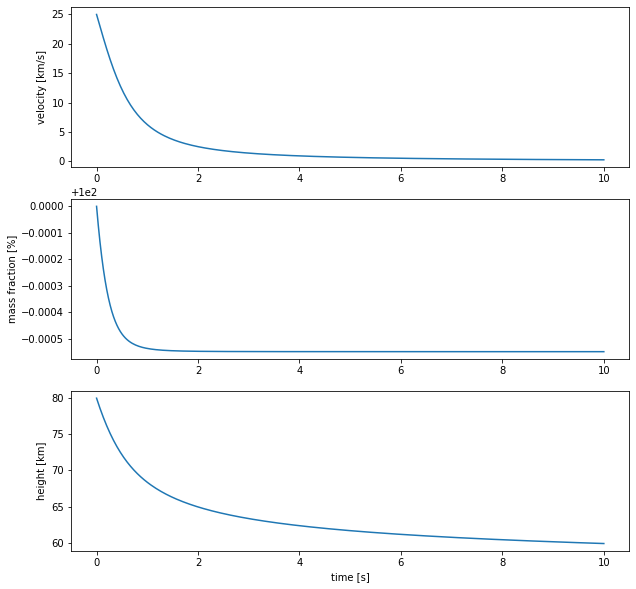

In [25]:
y0=[25, 1e-6, 80] #velocity, mass, altitude
t=np.linspace(0,10,300)
k=[K,sigma,30] #K, sigma, z_0 (in degrees)
y = odeint(model,y0,t, args=(k,))

fig,axs = plt.subplots(3, figsize=(10,10))

y.T[1]=y.T[1]/y0[1]*100

for i in range(3):
    axs[i].plot(t, y.T[i])

axs[2].set_xlabel("time [s]")
axs[0].set_ylabel("velocity [km/s]")
axs[1].set_ylabel("mass fraction [%]")
axs[2].set_ylabel("height [km]")
plt.show()

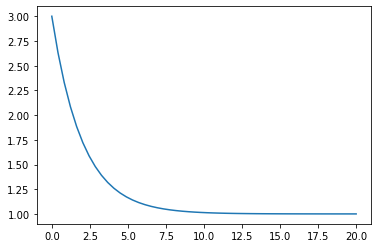

In [11]:
x=np.linspace(0,20)
y=1+2.*np.exp(-0.5*x)
plt.plot(x,y)